In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('student_scores.csv')

In [53]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

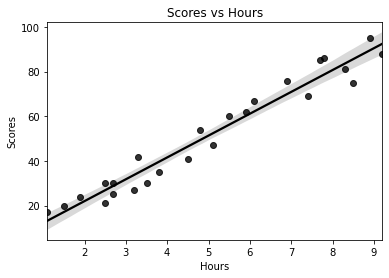

In [5]:
sns.regplot(x = 'Hours', y = 'Scores', data = df, color = 'black')
plt.title('Scores vs Hours')
plt.show()

So, from the above plot, we can see that there is a positive correlation between hours and Scores. 
Therfore, as Hours increases the scoring also increases. So, If the sudent studies for a long period of time there is a high probability of getting a good score. 

In [11]:
X = df[['Hours']]
y = df['Scores']

## SPLITTING THE DATA

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

## TRAINING THE ALGORITHM

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X_train,y_train)

LinearRegression()

## PREDICTION

In [33]:
y_pred = lm.predict(X_test)

In [45]:
pd.DataFrame({'Hours': 9.25},index = [0])

,Hours
0,9.25


In [46]:
#hours = pd.DataFrame({'Hours': 9.25})
hour = pd.DataFrame({'Hours': 9.25},index = [0])
own_pred = lm.predict(hour)

In [47]:
own_pred

array([93.43229054])

So, if the student studies for 9.65 hrs/day, he will score 93 marks. 

## TRAIN AND TEST SCORE

In [19]:
lm.score(X_test,y_test)

0.6683995499740194

In [22]:
lm.score(X_train,y_train)

0.95807022445042

## COMPARING ACTUAL VS PREDICTED

In [51]:
pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred, 'Error': abs(y_test-y_pred)})

,Actual,Predicted,Error
5,20,17.371423,2.628577
1,47,52.702923,5.702923
13,42,35.037173,6.962827
2,27,34.055743,7.055743
12,41,46.814340,5.814340


## EVALUATING THE MODEL

In [50]:
mean_absolute_error(y_test, y_pred)

5.632881746692995